<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Examples.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# Examples: Solving a regression problem
 
© ExploreAI Academy

In this train, we look at how to experiment with various modeling methods to solve a regression problem.

## Learning objectives

By the end of this train, you should be able to:
* Load and prepare a dataset.
* Train and evaluate linear, non-linear and ensemble regression models.

## 1. Introduction

We wish to examine and understand how socio-economic and environmental factors contribute to the rate of deforestation. We have been given a dataset that captures this information. Our goal to to model this relationship through regression analysis. 

In the sections that follow, we explore the process of training and evaluating various regression models on a similar dataset. Through the model experimentation process, we are able to compare the performance of various models, guiding the selection of the best model for predicting our target variable. 

## 2. Dataset and libraries

We begin by setting up our working environment by importing the necessary `Python` libraries that we will use throughout the notebook

Then, we load and inspect the dataset to get familiar with its structure and contents.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/regression_sprint/enviro_indicators.csv', index_col=0)
data.head()

,forest_coverage,biodiversity_index,protected_areas,deforestation_rate,carbon_sequestration,soil_erosion,land_degradation,rural_population,population_density
Country,,,,,,,,,
Vietnam,36.217808,6.505159,14.832708,36.583106,53.128459,7.987880,55.020903,35.912142,468.715839
Guinea-Bissau,76.550001,94.888554,23.994363,123.384939,279.836286,13.013811,41.655073,34.639379,351.054600
Bosnia and Herzegovina,61.239576,96.563203,9.932348,115.743745,237.834951,13.037065,26.951490,78.380633,289.329973
Lesotho,51.906094,80.839735,33.076894,111.752369,149.948515,11.179719,27.460479,43.585863,57.616482
Indonesia,20.921305,30.461377,7.609273,46.450326,103.939415,2.715506,46.297784,73.522793,311.353541


## 3. Data exploration

Here, we will perform a preliminary exploration of our dataset to get a better understanding of the data we are working with.

This initial exploration of our data, will help uncover underlying patterns and relationships that can inform our choice of models.

In [5]:
# Displaying data information
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Vietnam to Liechtenstein
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   forest_coverage       32 non-null     float64
 1   biodiversity_index    32 non-null     float64
 2   protected_areas       32 non-null     float64
 3   deforestation_rate    32 non-null     float64
 4   carbon_sequestration  32 non-null     float64
 5   soil_erosion          32 non-null     float64
 6   land_degradation      32 non-null     float64
 7   rural_population      32 non-null     float64
 8   population_density    32 non-null     float64
dtypes: float64(9)
memory usage: 2.5+ KB


`data.info()` gives us more information about our columns including their data types and the count of non-null values.

It seems we do not have any null values in our dataset. Also, all the features in the dataset are numeric.

Let's now create a pairwise plot to visualise and understand the relationships among the variables. Using `sns.pairplot()`, we can generate scatter plots for each pair of variables in our dataset, providing a comprehensive overview of how each variable interacts with the others. This can help us identify patterns that may influence our modeling decisions.

C:\Users\IyadM\anaconda3\envs\DS_Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\IyadM\anaconda3\envs\DS_Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\IyadM\anaconda3\envs\DS_Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\IyadM\anaconda3\envs\DS_Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

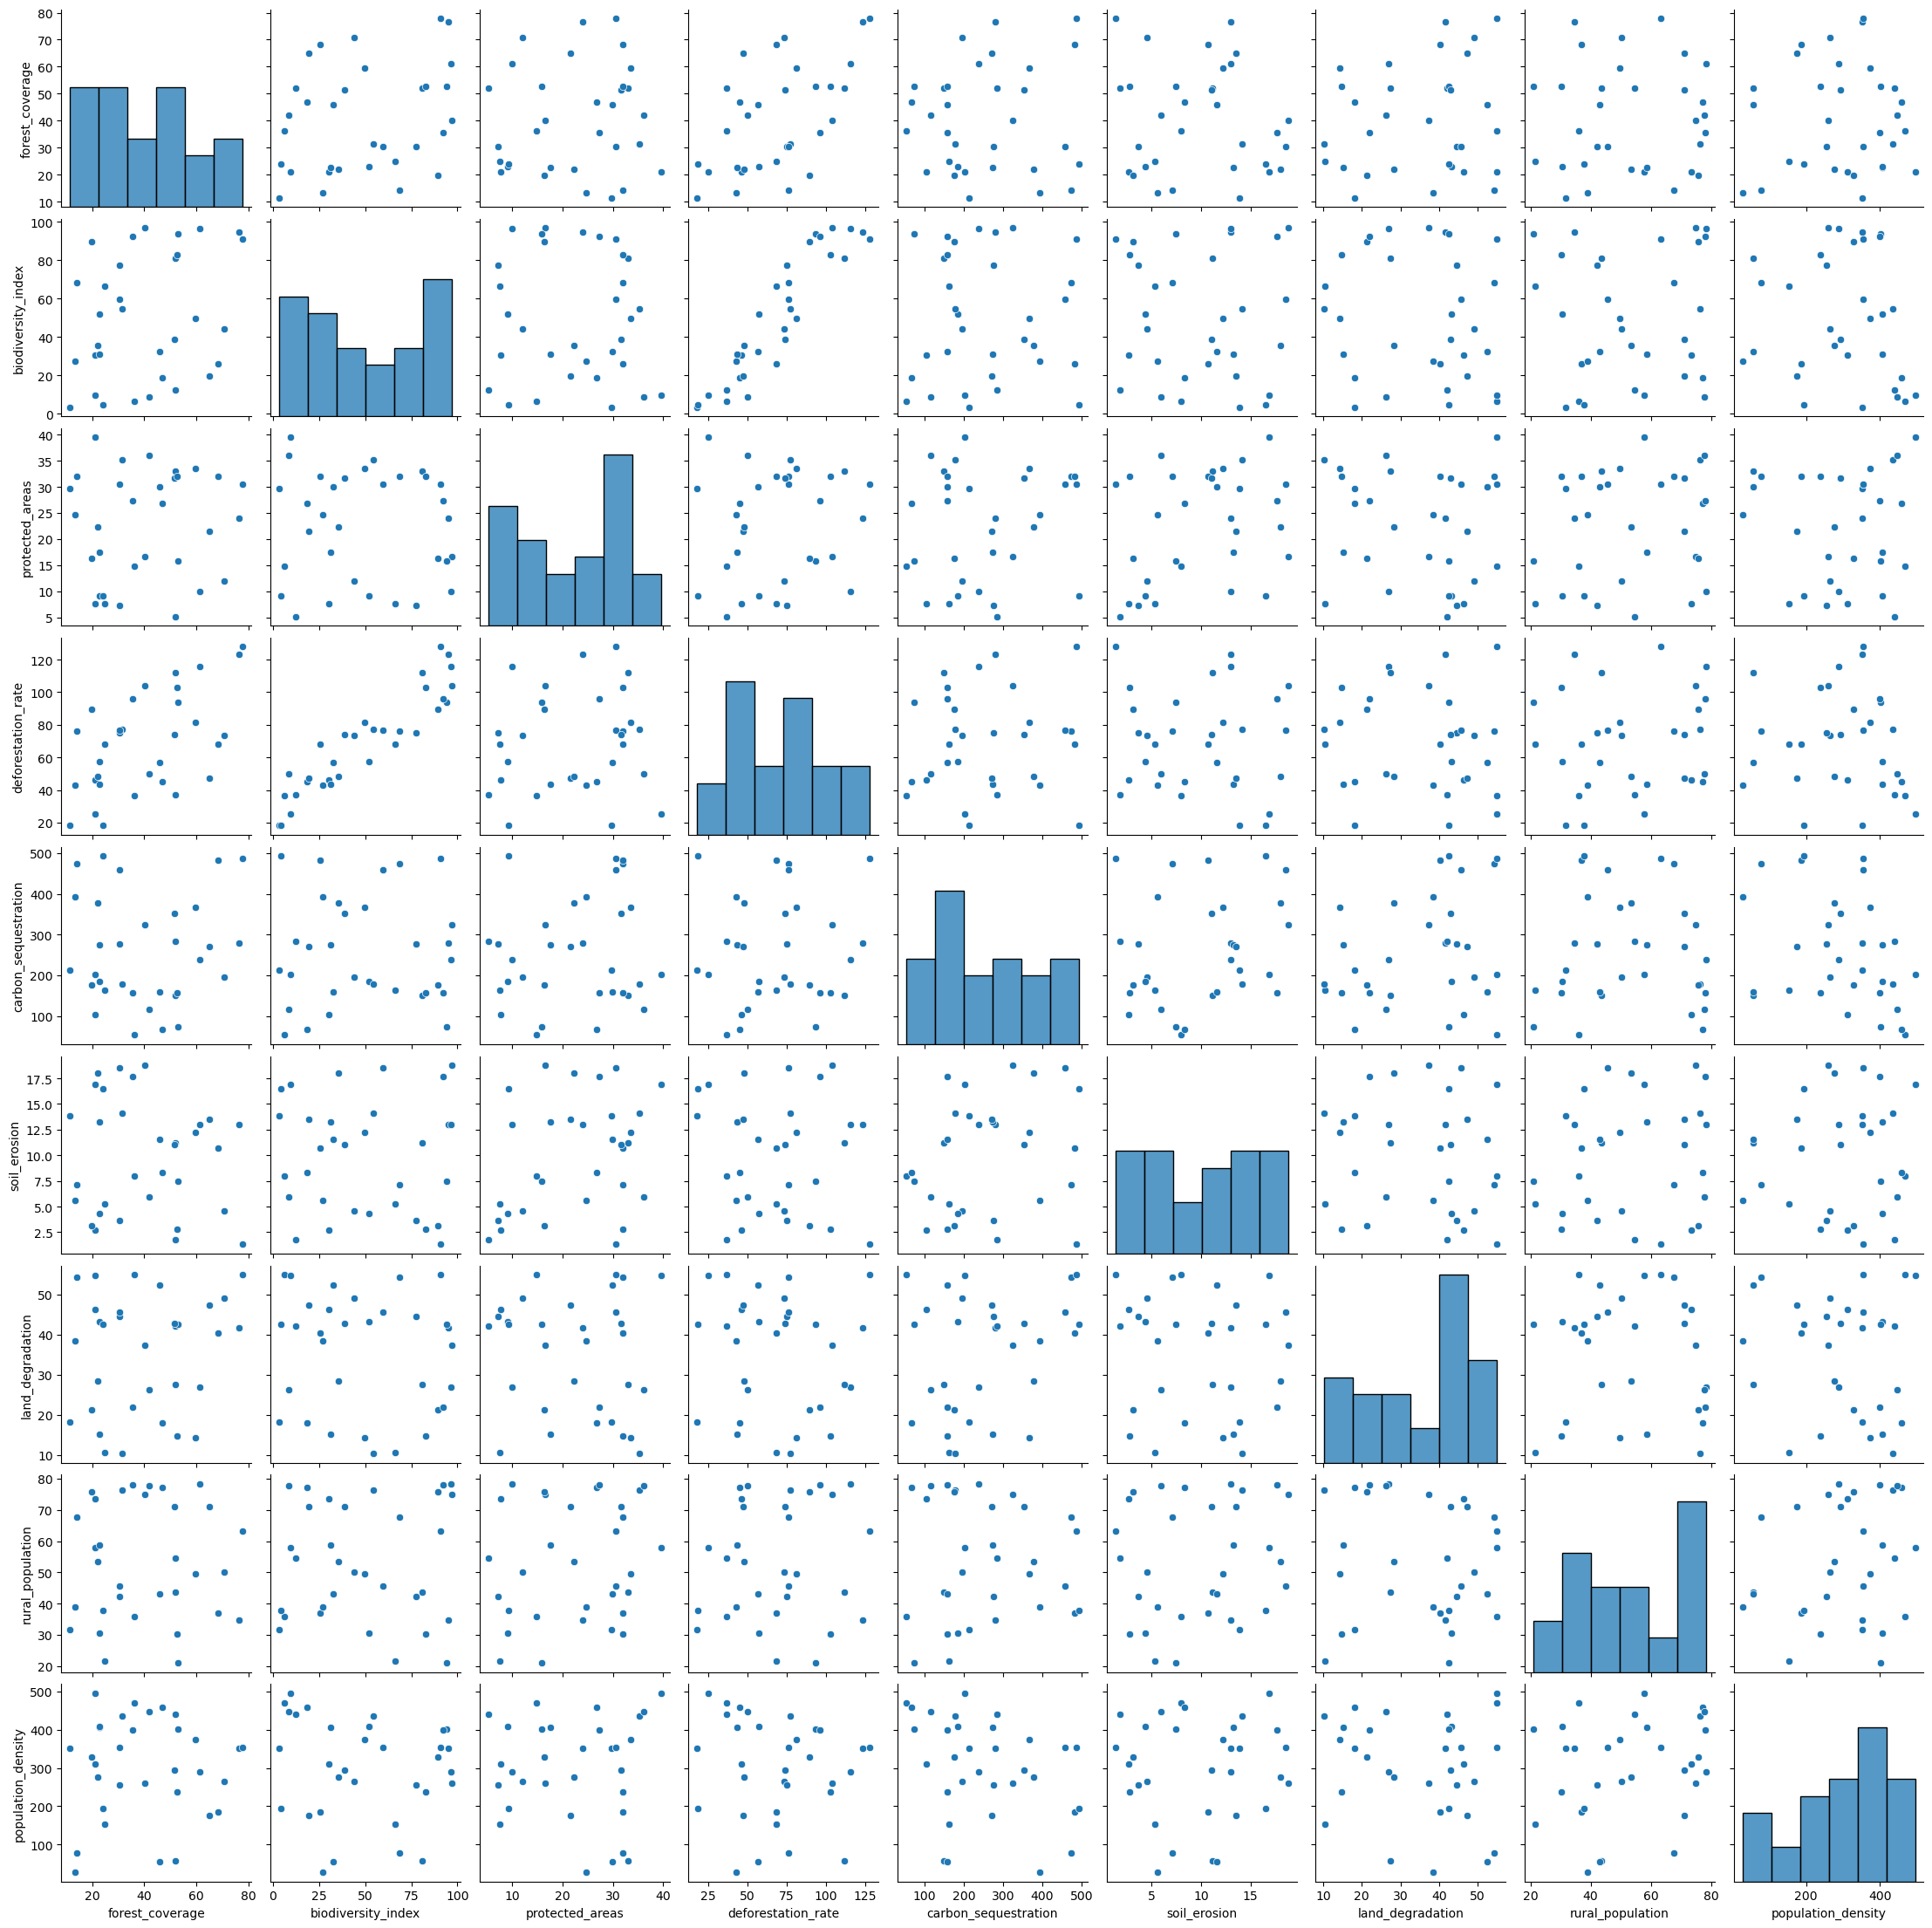

In [6]:
sns.pairplot(data)
plt.show()

Only `forest coverage` and `biodiversity_index` show a linear-like relationship with the target variable `deforestation_rate`. This observation suggests the potential of these variables to be strong predictors in a linear regression model. The rest of the variables, however, do not demonstrate a clear linear trend. This indicates more complex relationships that might not be adequately captured by a linear model alone.

Next, we perform **correlation analysis** to understand the correlation between the different features present in our dataset and our target variable,`deforestation_rate`.

In [7]:
# Calculating the correlation coefficients
correlation_matrix = data.corr()
correlation_with_target = correlation_matrix['deforestation_rate'].sort_values(ascending=False)

# Display the correlations with the target variable
print("Correlation of features with deforestation rate:\n", correlation_with_target)

Correlation of features with deforestation rate:
 deforestation_rate      1.000000
biodiversity_index      0.922463
forest_coverage         0.556136
protected_areas         0.120202
rural_population        0.105760
carbon_sequestration    0.063443
soil_erosion           -0.082024
land_degradation       -0.092885
population_density     -0.126157
Name: deforestation_rate, dtype: float64


We use the `.corr()` to calculate the correlation matrix for our dataset, then filtered the result to only contain the correlation coefficients related to the `deforestation_rate` column and sort them from the highest to the lowest. The results show that biodiversity_index, forest_coverage, population_density and protected_areas have some relationship with deforestation_rate. 

This way, we we can identify strong predictors for `deforestation_rate`.

**Note:** We need to consider both the positive and negative correlations, that is, the **highest positive** and the **highest negative values**. Alternatively, we can use `.abs` method to obtain the absolute values of the correlations, allowing us to sort them regardless of their direction.

Let's also plot a heatmap visualisation to further aid in understanding these relationships, highlighting the most significant correlations. This image makes it easy to also see relationship between the predictive variables, something that is good to keep in mind when doing regression analyses.

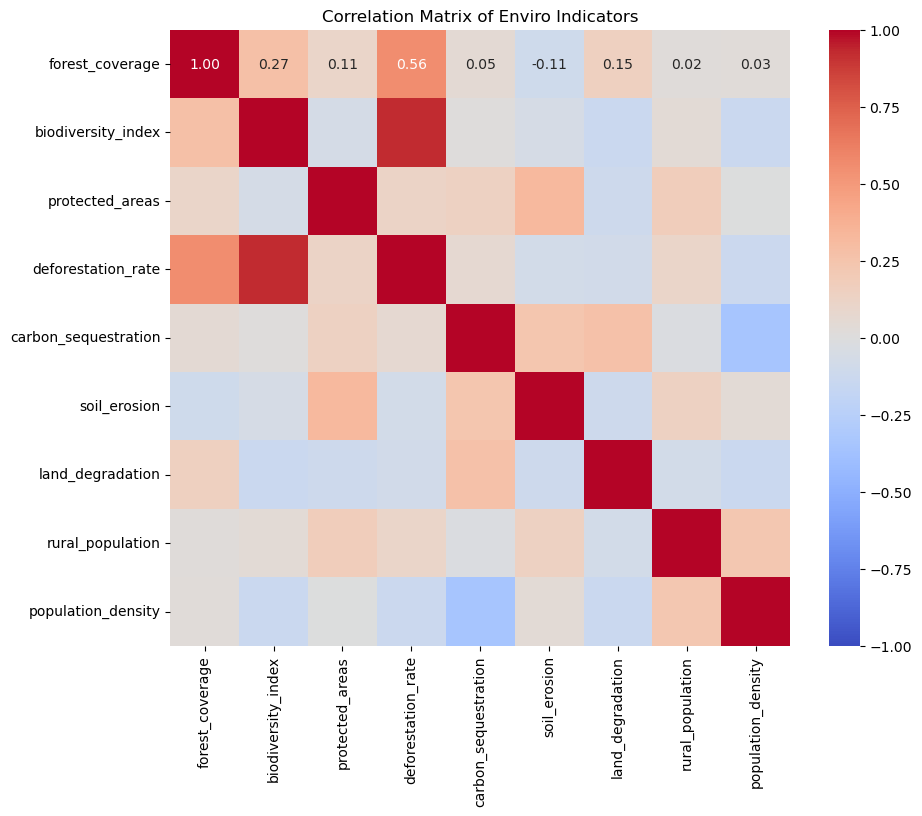

In [10]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix of Enviro Indicators')
plt.show()

## 4. Data preprocessing

We prepare the data for modeling by splitting it into training and testing sets and scaling the features to help our models perform optimally.

In [12]:
# Separate the feature and target variables
X = data.drop(['deforestation_rate'], axis=1)
y = data['deforestation_rate']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
# Initialize and apply MinMaxScaler for scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In the above code block, we prepare our features `X` and target variable `y` for modeling. The dataset is also split into training and testing sets, and feature scaling is applied using `MinMaxScaler`. This process ensures that our regression models do not bias towards variables with larger magnitudes.

## 5. Model training and evaluation

### 5.1 Simple linear regression model

Our journey into model training begins with a simple linear regression model. This model, while simple, serves as a great baseline to compare more complex models against. 

A simple linear regression model uses only one independent variable to predict the dependent variable.

From the correlation analysis we performed above, we observed that `biodiversity_index` had the strongest correlation with our target variable and also demonstrated a linear relationship. This makes it a good candidate as the predictor variable for our SLRM.

In [13]:
# Preparing data for simple linear regression

X_train_lr = pd.DataFrame(X_train_scaled, columns=X.columns)[['biodiversity_index']]
X_test_lr = pd.DataFrame(X_test_scaled, columns=X.columns)[['biodiversity_index']]

# Training the model
model_lr = LinearRegression()
model_lr.fit(X_train_lr, y_train)

# Making predictions on the test data
y_pred_lr = model_lr.predict(X_test_lr)

# Evaluating the model
print(f"R² Score: {r2_score(y_test, y_pred_lr)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr)}")

R² Score: 0.7796880837025596
MSE: 108.58195233862874


Note that, we convert the scaled arrays back into DataFrames to maintain the ability to reference columns by name.

Our simple linear regression model performed relatively well with an R-squared value above 0.7, but it could probably be improved on by adding a few more variables to the model. Let's see how this compares to the performance of other more complex models.

### 5.2 Other regression models

Let's expand our analysis by applying more complex models. Exploring these models will help us capture more complex patterns that a simple linear model might miss. This can, in turn, improve our model.

#### A generic function for model training and evaluation:

Let's develop a general function that we can use to train and test various regression models. This will enhance re-usability and reduce redundancy.

In [19]:
def train_and_evaluate_model(model):
    
    # Train the model on the scaled training data
    model.fit(X_train_scaled, y_train)
    
    # Make predictions on the scaled test set
    predictions = model.predict(X_test_scaled)
    
    # Evaluate the model
    r2 = r2_score(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    
    return model, r2, mse

The `train_and_evaluate_model` function trains the provided model on the preprocessed and scaled training data, evaluates it against the test set, and returns the trained model along with its R² and Mean Squared Error (MSE) scores.

**Note:** While using a generic function for model training and evaluation is a good idea for simplicity and efficiency, it may be limiting in some cases such as where the data or the importance of features varies across models. In such cases, we can train and evaluate each model separately to tailor the selection of features and fine-tune the model's performance to the specific characteristics of the data.

### 5.2.1 Multiple linear regression model

We apply the previously defined function to train and evaluate a multiple linear regression model, where we use all available features (after scaling) to predict the rate of deforestation. This way, we get to leverage the predictive value of the rest of the features.

We get to observe how a more complex linear approach compares to the simpler, single-variable linear regression.

In [20]:
# Training and evaluating the multiple linear regression model
linear_model, linear_r2, linear_mse = train_and_evaluate_model(LinearRegression())
print(f"Linear regression - R²: {linear_r2}, MSE: {linear_mse}")

Linear regression - R²: 0.9640788719206097, MSE: 17.70392760689473


We can see that the model has performed better, given the increase in R2 score and a decrease in the MSE. It would be interesting to test this model with only the strongest predictors as well - it could be informative to assess whether there is a big drop in predictive power if we drop some of the weaker predictors. 

### 5.2.2 Decision tree regression model

We apply the previously defined function to train and evaluate a decision tree regression model. This allows us to explore the capabilities of a non-linear model in capturing the non-linear patterns we earlier observed in the data.

In [21]:
# Training and evaluating the decision tree regression model
tree_model, tree_r2, tree_mse = train_and_evaluate_model(DecisionTreeRegressor(random_state=42, max_depth=4))
print(f"Decision tree regression - R²: {tree_r2}, MSE: {tree_mse}")

Decision tree regression - R²: 0.7601401895456967, MSE: 118.21624061196674


The decision tree does not perform as well as expected. It could be because there are several variables included that don't hold that much predictive power, or the fact that our tree has a max_depth parameter that was set to 4, which is quite shallow. Ideally, we should run multiple iterations of decision trees, with different parameters to determine the optimal fit.

### 5.3 Ensemble models

We have so far only trained stand alone models. Here, we want to apply ensembling techniques where we combine multiple machine learning models in an attempt to improve predictive performance. Let's try out both a homogeneous and a heterogeneous ensemble model.

### 5.3.1 Random forest regression model

We apply the previously defined function to train and evaluate a random forest regression model. It leverages the the power of homogenous ensemble learning by combining multiple decision trees.

In [29]:
# Training and evaluating the random forest regression model
forest_model, forest_r2, forest_mse = train_and_evaluate_model(RandomForestRegressor(random_state=42, max_depth=6))
print(f"Random Forest Regression - R²: {forest_r2}, MSE: {forest_mse}")

Random Forest Regression - R²: 0.8819868679086817, MSE: 58.16342801345193


We can see an improvement in the performance of our model. This is because random forests, by aggregating the predictions of numerous decision trees, reduce the risk of overfitting and offer a more generalisable model. Again, try testing it with different levels of max_depth to see what the outcomes are. 

### 5.3.2 Stacking ensemble model

Let's also try and capitalise on the unique strengths of other different model types than just the decision trees. To be precise, we will apply stacking where we will train a meta-learner based on the outputs of some base models.

We will use some of the models we have already trained as our base learners and a new model as the meta-learner.

Let's start by defining our base models and the meta-learner:

In [30]:
# Define the base models: these are models that have already been trained
base_models = [
    ('linear_regression', linear_model),
    ('random_forest', forest_model)
]

# Define the meta-learner
final_estimator = LinearRegression()

We then apply our generic function to train and evaluate a stacking regression model.

In [31]:
# Training and evaluating the stacking regression model
stacking_model, stacking_r2, stacking_mse = train_and_evaluate_model(StackingRegressor(estimators=base_models, final_estimator=final_estimator, cv=5))
print(f"Stacking Regression - R²: {stacking_r2}, MSE: {stacking_mse}")

Stacking Regression - R²: 0.9637452391900153, MSE: 17.868360352344116


We have used the `StackingRegressor` from `scikit-learn`, specifying our previously trained multiple linear regression, and random forest models as the base models and a linear legression model as the final estimator. While this is must a quick test o 

We note a marginal improvement in performance in comparison to the stand alone models, but should also consider whether the cost (in terms of time and memory), is worth the improvement in predictive powers.

In our journey to solve a regression problem, we have explored different modeling options, each offering different strengths that could be used to solve the problem at hand. In the end, our goal is to achieve a good balance between performance and simplicity, and remember, more advanced models may not always be the best, despite convincing metrics!

#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>